In [1]:
import subprocess
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime


import warnings
warnings.filterwarnings("ignore")
Data_path = 'data/'
csv_path = Data_path + 'CSV/'
csv_files = os.listdir(csv_path)

In [2]:
def read_data_given_id(path,ids):
    '''read data given a list of ids and CSV paths'''
    start = datetime.now()
    n = len(ids)
    if n == 0:
        return {}
    else:
        data = {}
        for _id in ids:
            file = open(f'{csv_path}{_id}.csv')
            csvreader = csv.reader(file)
            rows = []
            for row in csvreader:
                rows.append(tuple(row))
            data[_id] = np.array(rows[:10000],dtype=[('current',float),('voltage',float)])
            file.close()
    return data
        

In [3]:
import json

with open(Data_path + 'meta1.json') as data_file:    
    meta1 = json.load(data_file)
meta = [meta1]

In [4]:
def clean_meta(ist):
    '''remove '' elements in Meta Data ''' 
    clean_ist = ist.copy()
    for k,v in ist.items():
#         if 
        if len(v) == 0:
            del clean_ist[k]
    return clean_ist
                
def parse_meta(meta):
    '''parse meta data for easy access'''
    M = {}
    for m in meta:
        for app in m:
            M[int(app['id'])] = clean_meta(app['meta'])
    return M

In [5]:
Meta = parse_meta(meta)

In [6]:
Meta[1].keys()

dict_keys(['appliance', 'header', 'instances', 'location'])

In [7]:
# applinace types of all instances
Types = [x['appliance']['type'] for x in Meta.values()]
# unique appliance types
Unq_type = list(set(Types)) 
Unq_type.sort()
print(Unq_type)

# houses
Houses = [x['location'] for x in Meta.values()]
# unique households
Unq_loc = list(set(Houses))
Unq_loc.sort()
Origianl_Unq_type = Unq_type
# appliances
Apps = [x['location']+'-'+x['appliance']['type'] for x in Meta.values()]

['Air Conditioner', 'Compact Fluorescent Lamp', 'Fan', 'Fridge', 'Hairdryer', 'Heater', 'Incandescent Light Bulb', 'Laptop', 'Microwave', 'Vacuum', 'Washing Machine']


In [8]:
print('number of total instances: %d' % len(Types))
print('number of unique households: %d' % len(set(Houses)))
print('number of unique appliances: %d' % len(set(Apps)))
print('number of unique appliance types: %d' % len(Unq_type))

number of total instances: 1074
number of unique households: 55
number of unique appliances: 230
number of unique appliance types: 11


In [28]:
print('%25s\t%8s\t%8s' % ('Appliance Type', '# Appliances', '# Instances'))
print('-'*70)
for t in Unq_type:
    app_ids = [i for i in Apps if t in i]
    t_ids = [i for i,j in enumerate(Types) if j == t]
    print('%25s\t%10d\t%10d' % (t,len(set(app_ids)),len(t_ids)))
print('-'*70)
print('%25s\t%10d\t%10d' % ('Total',len(set(Apps)),len(Types)))

           Appliance Type	# Appliances	# Instances
----------------------------------------------------------------------
          Air Conditioner	        14	        66
 Compact Fluorescent Lamp	        31	       175
                      Fan	        23	       115
                   Fridge	        21	        38
                Hairdryer	        32	       156
                   Heater	         7	        35
  Incandescent Light Bulb	        23	       114
                   Laptop	        34	       172
                Microwave	        28	       139
                   Vacuum	         8	        38
          Washing Machine	         9	        26
----------------------------------------------------------------------
                    Total	       230	      1074


In [29]:
import random

count = 5
num_type = len(Unq_type)
fs = 30000

ids_to_draw = {}
t_data = {}
for (ii,t) in enumerate(Unq_type):
    t_ids = [i for i,j in enumerate(Types,start=1) if j == t]
    ids_to_draw[t] = random.sample(t_ids, count)
    print(ids_to_draw[t])
    t_data[t] = read_data_given_id(csv_path, ids_to_draw[t])

[428, 787, 291, 425, 375]
[434, 429, 862, 746, 822]
[683, 252, 315, 1034, 685]
[462, 333, 631, 547, 459]
[574, 156, 109, 612, 552]
[352, 663, 135, 207, 321]
[520, 653, 341, 344, 655]
[982, 30, 670, 1071, 582]
[901, 779, 10, 309, 1048]
[876, 56, 54, 698, 1055]
[488, 906, 623, 532, 534]


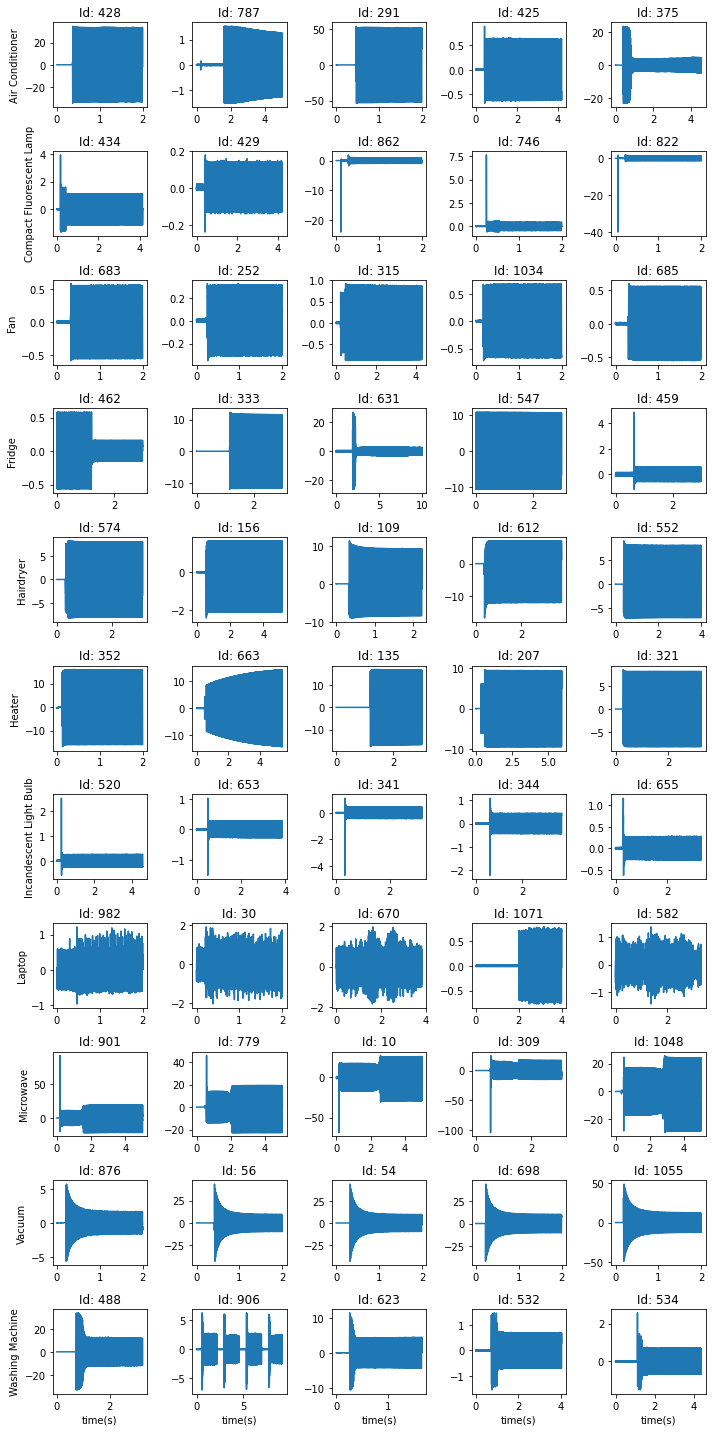

In [30]:
# plot current
fig = plt.figure(figsize=(10,20))
ids_to_draw = {}
for (ii,t) in enumerate(Unq_type):
    jj = 0
    for (k,v) in t_data[t].items():
        plt.subplot(num_type,count,ii*count+jj+1)
        plt.plot(np.linspace(1./fs,len(v['current'])/fs,num=len(v['current'])),v['current'])
        if ii==num_type-1:
            plt.xlabel('time(s)')
        if jj==0: 
            plt.ylabel(t,fontsize=10)
        plt.title('Id: '+str(k))
        jj += 1
fig.tight_layout()
plt.show()    

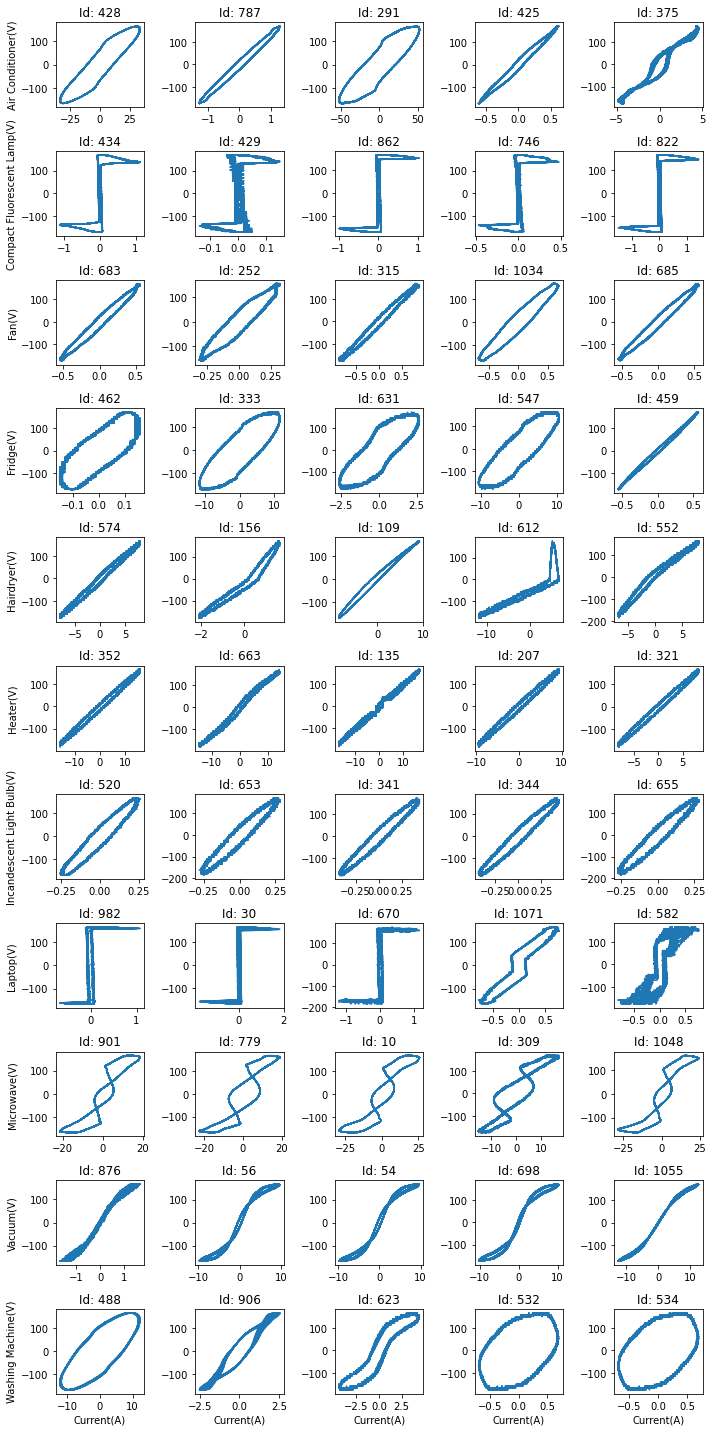

In [31]:
# plot V-I of last 10 steady state periods
fig = plt.figure(figsize=(10,20))
ids_to_draw = {}
for (ii,t) in enumerate(Unq_type):
    jj = 0
    for (k,v) in t_data[t].items():
        plt.subplot(num_type,count,ii*count+jj+1)
        plt.plot(v['current'][-10000:],v['voltage'][-10000:])
        if ii==num_type-1:
            plt.xlabel('Current(A)')
        if jj==0: 
            plt.ylabel(t+ '(V)',fontsize=10)
        plt.title('Id: '+str(k))
        jj += 1
fig.tight_layout()
plt.show()   

In [33]:
Meta[30]

{'appliance': {'brand': '',
  'current': '',
  'load': 'NL',
  'manufacture_year': '',
  'model_number': '',
  'notes': '',
  'status': 'off-on',
  'type': 'Laptop',
  'voltage': '',
  'wattage': ''},
 'header': {'collection_time': 'July, 2013',
  'notes': 'some instances are not well calibrated, meta data are not complete',
  'sampling_frequency': '30000Hz'},
 'instances': {'length': '2.00s'},
 'location': 'house2'}

In [34]:
IDs_for_read_data = list(Meta.keys())
npts = 10000
Data = read_data_given_id(csv_path,IDs_for_read_data)

In [ ]:
fs = 30000
f0 = 60
NS = fs//f0 # number of samples per period
NP = npts//NS # number of periods for npts
# calculate the representative one period of steady state 
# (mean of the aggregated signals over one cycle)
n = len(Data)
rep_I = np.empty([n,NS])
rep_V = np.empty([n,NS])
for i in range(1,n):
    tempI = np.sum(np.reshape(Data[i]['current'][:10000],[NP,NS]),0)/NP
    tempV = np.sum(np.reshape(Data[i]['voltage'][:10000],[NP,NS]),0)/NP
    # align current to make all samples start from 0 and goes up
    ix = np.argsort(np.abs(tempI))
    j = 0
    for j in range(0,500):
        if ix[j]<499 and tempI[ix[j]+1]>tempI[ix[j]]:
            real_ix = ix[j]
            break
        else:
            j += 1
    rep_I[i,] = np.hstack([tempI[real_ix:],tempI[:real_ix]])
    rep_V[i,] = np.hstack([tempV[real_ix:],tempV[:real_ix]])

In [ ]:
type_Ids = {}
loc_Ids = {}
n = len(Data)
type_label = np.zeros(n,dtype='int')
loc_label = np.zeros(n,dtype='int')
for (ii,t) in enumerate(Unq_type):
    type_Ids[t] = [i-1 for i,j in enumerate(Types,start=1) if j == t]
    type_label[type_Ids[t]] = ii+1
for (ii,t) in enumerate(Unq_loc):
    loc_Ids[t] = [i-1 for i,j in enumerate(Houses,start=1) if j == t]
    loc_label[loc_Ids[t]] = ii+1
print('number of different types: %d'% len(Unq_type))
print('number of different households: %d'% len(Unq_loc))

In [ ]:
loc_label

In [ ]:
plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = (10, 6)

import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 17}
matplotlib.rc('font', **font)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
plt.hist(type_label,len(Unq_type))
plt.title('distirbution of instances for each type')
print(Origianl_Unq_type)
print('Similified verstion:')
Unq_type[0]='AC';
Unq_type[1]='CFL';
Unq_type[6]='Bulb';
Unq_type[10]='Washer';
print(Unq_type)
plt.savefig('type_dist.eps', format='eps')

In [ ]:
plt.hist(loc_label,len(Unq_loc))
plt.title('distirbution of instances for each household')
plt.savefig('house_dist.eps', format='eps')

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

def myclassifiers(X_train,y_train,X_test,y_test,verbose=False):
    
    knn = KNeighborsClassifier(n_neighbors=1)
    gnb = GaussianNB()
    logistic = LogisticRegression(C=1e5)
    svc = svm.SVC(kernel='rbf',gamma=.7,C=1.0)
    lda = LDA(solver='lsqr', shrinkage='auto')
    qda = QDA()
    dTree = tree.DecisionTreeClassifier(max_depth=10)
    rForest = RandomForestClassifier(max_depth=10,n_estimators=20)
    adaBoost = AdaBoostClassifier()
    
    names = ["Nearest Neighbors(k=1)", "Naive Bayes","Logistic","RBF SVM", "LDA", "QDA",
             "Decision Tree","Random Forest", "AdaBoost"]
    classifiers = [knn, gnb, logistic, svc, lda, qda, dTree, rForest, adaBoost]
    y_predict = []
    acc = []
#     print('Running',end="")
    for (i,clf) in enumerate(classifiers):
        if verbose:
            print(' %s... '% names[i],end="")
        clf.fit(X_train,y_train)
        y_predict.append(clf.predict(X_test))
        acc.append(clf.score(X_test,y_test))
    return (acc,y_predict,names)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(rep_I[:,:10], type_label, test_size=0.1, random_state=0)
(acc,y_p,names) = myclassifiers(X_train,y_train,X_test,y_test)

In [ ]:
from math import ceil
RawCF = rep_I
# visualization of current features from certain type in RawCF
type_id = 4
n = sum(type_label==type_id)
fig = plt.figure(figsize=(14,np.int(ceil(n/15))))
count = 1
for i in np.where(type_label==type_id)[0]:
    plt.subplot(int(np.ceil(n/10)),15,count)
    plt.plot(RawCF[i,],'.')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
#     plt.title('Id: '+str(k),fontsize=10)
    count += 1
fig.tight_layout()
print(Unq_type[type_id-1])
plt.show()  

In [ ]:
# plot five instances
ids = [1,8,3,4]
normalize = lambda x:x/(max(x)*1.1)
for i in ids:
    plt.plot(normalize(RawCF[np.where(type_label==i)[0][0],]),'.',label=Unq_type[i-1])
    plt.legend()
plt.xlabel('count')
plt.ylabel('normalized current value')
plt.title('One Period of Steady State')

In [ ]:
f0 = 60
fs = 3e4
n = len(Data)
NN = int(fs//f0)
NS = npts//NN
PQ = np.empty([n,NS,2])

for i in range(n):
    for j in range(NS-1):
        # extract current and voltage in two cycle
        temp_I = Data[i+1]['current'][j*NN:(j+2)*NN]
        temp_V = Data[i+1]['voltage'][j*NN:(j+2)*NN]
        # extract abs part(apparent component), divided by the number of points
        apparI = np.abs(2*np.fft.fft(temp_I))/NN
        apparV = np.abs(2*np.fft.fft(temp_V))/NN
        # phase difference
        theta = np.angle(np.fft.fft(temp_V)) - np.angle(np.fft.fft(temp_I))
        # calculate real/reactive power
        tempP = 1/2*apparV*apparI*np.sin(theta)
        tempQ = 1/2*apparV*apparI*np.cos(theta)
        # sum the power of different orders
#         PQ[i,j,0] = np.sum(tempP)
#         PQ[i,j,1] = np.sum(tempQ)
        # take only the fundamental active/reactive power 
        PQ[i,j,0] = (tempP[2])
        PQ[i,j,1] = (tempQ[2])
PQ = np.delete(PQ,np.where(np.isnan(PQ))[1],1)
# choose the median value among all cycles
PQ = np.median(PQ,1)

In [ ]:
import matplotlib.cm as cmx
import matplotlib.colors as colors

def get_cmap(N):
    '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.'''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color 

cmap = get_cmap(11)
Legends=('AC','CFL','Fan','Fridge','Hairdryer','Heater','Bulb','Laptop','Microwave','Vaccum','Washer')
markers='ov^<>sph+Dx'
colors='bgrcmk'
minx,maxx,miny,maxy = (0,0,0,0)
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(1,1,1)
ax.set_position([0.1,0.1,.6,0.8])
# visualization of current features from certain type in PQ
for i in range(11):
    ix=np.where(type_label==i+1)[0]
    # ignore appliances with high real/reactive power for better visualization
    temp_PQ = np.delete(PQ[ix], np.unique(np.where(np.abs(PQ[ix]) > 3000)[0]), 0)
    ix1 = np.random.randint(temp_PQ.shape[0],size=5)
    tempx = temp_PQ[ix1,0]
    tempy = temp_PQ[ix1,1]
    plt.scatter(tempx,tempy,c=cmap(i),marker=markers[i], s=100, label=Legends[i])
    minx = min(minx,min(tempx))
    maxx = max(maxx,max(tempx))
    miny = min(miny,min(tempy))
    maxy = max(maxy,max(tempy))    
plt.axis([minx*0.9,maxx*1.1,miny*0.9,maxy*1.1])
plt.xlabel('Real Power(W)')
plt.ylabel('Reactive Power (VAR)')
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
# plt.tight_layout()
plt.savefig('PQ.eps', format='eps')

In [ ]:
n = len(Data)
order = 21
p = order + 1 # number of harmonics to be extracted, include 0-th component
harmonics = np.linspace(0,order,num=p)
fs = 30000
npts = 10000
f0 = 120 # for power

HarmonicsF = np.empty([n,p])
# visualize power harmonics of one instance
ix = 100
temp_P = Data[ix]['current']*Data[ix]['voltage']
x = np.linspace(0,fs,num=npts)
y = np.abs(np.fft.fft(temp_P))
plt.plot(x[:200],y[:200],'.-')

In [ ]:
for i in range(n):
    temp_P = Data[i+1]['current']*Data[i+1]['voltage']
    y = np.abs(np.fft.fft(temp_P))
    h = 40*harmonics
    h = h.astype(int)
    HarmonicsF[i,] =y[h]
HarmonicsF[1,]

In [ ]:
HarmonicsF.shape

In [ ]:
# visualization of harmonics features from certain type
from mpl_toolkits.mplot3d import Axes3D

ix1=np.where(type_label==9)[0][:4]
ix2=np.where(type_label==7)[0][:4]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=HarmonicsF[ix1,0], ys=HarmonicsF[ix1,1], zs=HarmonicsF[ix1,2],c='r',s=80)
ax.scatter(HarmonicsF[ix2,0], HarmonicsF[ix2,1], zs=HarmonicsF[ix2,2],c='b',s=80)
ax.set_xlabel('1st harmonics')
ax.set_ylabel('2nd harmonics')
ax.set_zlabel('3rd harmonics')

plt.show()

In [ ]:
num = 20 # number of bins

def get_BinF(X,num):
    '''X should be nd array of size N*P, the output will be N*num'''
    (N,P) = X.shape
    newP = int(np.floor(P/num)*num)
    newX = np.reshape(X[:,:newP],[N,num,newP//num])
    BinF = np.sum(newX,2)
    return BinF

BinF_I = get_BinF(rep_I,num)    
BinF_V = get_BinF(rep_V,num) 

In [ ]:
BinF = np.hstack([BinF_I,BinF_V])

In [ ]:
BinF.shape

In [ ]:
Unq_type

In [ ]:
BinF[1,:]

In [ ]:
i = 100
plt.plot(BinF_I[i,:],'.')
plt.title('Down Sampled Current of ' + Unq_type[type_label[i]])
plt.xlabel('count')
plt.ylabel('value')
plt.show()

In [ ]:
# visualization of all Bin current features from certain type in BinF
type_id = 4
n = sum(type_label==type_id)
fig = plt.figure(figsize=(14,int(np.ceil(n/15))))
count = 1
for i in np.where(type_label==type_id)[0]:
    plt.subplot(int(np.ceil(n/10)),15,count)
    plt.plot(BinF_I[i,],'.')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
#     plt.title('Id: '+str(k),fontsize=10)
    count += 1
fig.tight_layout()
plt.show()  

In [ ]:
def center(X,w):
    minX = np.amin(X)
    maxX = np.amax(X)
    dist = max(abs(minX),maxX)
    X[X<-dist] = -dist
    X[X>dist] = dist
    d = (maxX-minX)/w

    return (X,d)
    
def get_img_from_VI(V, I, width,hard_threshold=False,para=.5):
    '''Get images from VI, hard_threshold, set para as threshold to cut off,5-10
    soft_threshold, set para to .1-.5 to shrink the intensity'''
    
    d = V.shape[0]
    # doing interploation if number of points is less than width*2
    if d<2* width:
        newI = np.hstack([V, V[0]])
        newV = np.hstack([I, I[0]])
        oldt = np.linspace(0,d,d+1)
        newt = np.linspace(0,d,2*width)
        I = np.interp(newt,oldt,newI)
        V = np.interp(newt,oldt,newV)
    # center the current and voltage, get the size resolution of mesh given width    
    (I,d_c)  = center(I,width)
    (V,d_v)  = center(V,width)
    #  find the index where the VI goes through in current-voltage axis
    ind_c = np.floor((I-np.amin(I))/d_c).astype(int)
    ind_v = np.floor((V-np.amin(V))/d_v).astype(int)
    ind_c[ind_c==width] = width-1
    ind_v[ind_v==width] = width-1
    
    Img = np.zeros((width,width))
    
    for i in range(len(I)):
        Img[ind_c[i],width-ind_v[i]-1] += 1
    
    if hard_threshold:
        Img[Img<para] = 0
        Img[Img!=0] = 1
        return Img
    else:
        return (Img/np.max(Img))**para

In [ ]:
n = len(Data)
width = 16
Imgs = np.zeros((n,width,width), dtype=np.float64)
for i in range(1,n):
    Imgs[i,:,:] = get_img_from_VI(rep_V[i,], rep_I[i,], width,True,1)
BinaryF=np.reshape(Imgs,(n,width*width))

In [ ]:
# visualization of all imgaes from certain type in Imgs
type_id = 1
n = sum(type_label==type_id)
fig = plt.figure(figsize=(14,np.ceil(n/15)))
count = 1
for i in np.where(type_label==type_id)[0]:
    plt.subplot(int(np.ceil(n/10)),15,count)
    plt.imshow(Imgs[i,:,:],cmap = cm.Greys_r,interpolation='None')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
#     plt.title('Id: '+str(k),fontsize=10)
    count += 1
fig.tight_layout()
plt.show()  

In [ ]:
plt.style.use('classic')
# AC-1,CFL-2,hairdryer-5,laptop-8
ix=np.where(type_label==1)[0][30]
fig=plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(2,3,1)
plt.plot(rep_V[ix,:],rep_I[ix,:])
plt.title('VI trajectory of Air Conditioner')
# plt.xlabel('Voltage')
# plt.ylabel('Current')

ax = fig.add_subplot(2,3,2)
plt.plot(rep_V[ix,:],rep_I[ix,:],'.')
xticks = np.linspace(min(rep_V[ix,:]),max(rep_V[ix,:]),num=16)
yticks = np.linspace(min(rep_I[ix,:]),max(rep_I[ix,:]),num=16)
plt.axis([min(rep_V[ix,:]),max(rep_V[ix,:]),min(rep_I[ix,:]),max(rep_I[ix,:])])
ax.set_xticks(xticks)
ax.set_yticks(yticks)
plt.tick_params(axis='both',which='both',labelbottom='off',labelleft='off')
# plt.tick_params(axis='y',which='both',labelbottom='off')
plt.title('Meshed version of VI')
ax.grid(which='both')

ax3 = fig.add_subplot(2,3,3)
plt.imshow(Imgs[ix,:,:],cmap = cm.Greys_r,interpolation='None')
plt.title('VI binary image of Air Conditioner')
plt.tick_params(axis='both',which='both',labelbottom='off',labelleft='off')

ax4 = fig.add_subplot(2,3,4)
ix=np.where(type_label==2)[0][13]
plt.imshow(Imgs[ix,:,:],cmap = cm.Greys_r,interpolation='None')
plt.tick_params(axis='both',which='both',labelbottom='off',labelleft='off')
plt.title('VI binary image of CFL')


ax5 = fig.add_subplot(2,3,5)
ix=np.where(type_label==5)[0][19]
plt.imshow(Imgs[ix,:,:],cmap = cm.Greys_r,interpolation='None')
plt.tick_params(axis='both',which='both',labelbottom='off',labelleft='off')
plt.title('VI binary image of Hairdryer')

ax6 = fig.add_subplot(2,3,6)
ix=np.where(type_label==8)[0][13]
plt.imshow(Imgs[ix,:,:],cmap = cm.Greys_r,interpolation='None')
plt.tick_params(axis='both',which='both',labelbottom='off',labelleft='off')
plt.title('VI binary image of Laptop')


plt.tight_layout()
plt.show()
fig.savefig('VI.eps', format='eps')
plt.style.use('ggplot')

In [ ]:
from sklearn.decomposition import PCA

# write a function to extract up to certain percent of projected components
def get_PCs(X,p):
    # X: nd array of size sample_nums*features, 
    # p: percentage of variation to be taken
    pca = PCA(whiten=True)
    pca.fit(X)
    ix=np.where(np.cumsum(pca.explained_variance_ratio_)>p)[0][0]
    pca = PCA(n_components=ix,whiten=True)
    return pca.fit_transform(X)

In [ ]:
p = .99
PCA_BinF = get_PCs(BinF,p)
PCA_BinaryF = get_PCs(BinaryF,p)
PCA_RawCF = get_PCs(RawCF,p)

In [ ]:
np.isnan(np.sum(PCA_BinF))

In [ ]:
np.isnan(np.sum(PCA_BinaryF))

In [ ]:
np.isnan(np.sum(PCA_RawCF))

In [ ]:
def lowDimVisualize(F,filename):

    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA
    model = TSNE(n_components=2, random_state=0)
    pca = PCA(n_components=2,whiten=True)
    newHar = model.fit_transform(F)

    TSNEF = newHar
    PCAF = pca.fit_transform(F)


    colors = cm.rainbow(np.linspace(0, 1, 11))
    Legends=('AC','CFL','Fan','Fridge','Hairdryer','Heater','Bulb','Laptop','Microwave','Vaccum','Washer')
    # markers='ov^<>sph+Dx'
    fig = plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    for i, c in zip(range(11), colors):
        ix = np.where(type_label==i+1)[0]
        plt.scatter(TSNEF[ix,0], TSNEF[ix,1], color=c,label=Legends[i])
    plt.title('2D Visulization of TSNE')
    plt.subplot(1,2,2)
    for i, c in zip(range(11), colors):
        ix = np.where(type_label==i+1)[0]
        plt.scatter(PCAF[ix,0], PCAF[ix,1], color=c,label=Legends[i])
    plt.title('2D Visulization of PCA')

    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    # plt.tight_layout()
    fig.savefig(filename, format='eps')

In [ ]:
# look at harmonics
lowDimVisualize(HarmonicsF,'harmonics_TSNE_PCA.eps')

In [ ]:
# look at binary images
lowDimVisualize(BinaryF,'Binary_TSNE_PCA.eps')

In [ ]:
# look at raw current
lowDimVisualize(RawCF,'raw_current_TSNE_PCA.eps')

In [ ]:
# look at one period of representative current and voltage
lowDimVisualize(np.hstack([rep_I,rep_V]),'raw_IV_1P_TSNE_PCA.eps')

In [ ]:
# look at down sampled feature
lowDimVisualize(BinF,'down_sampled_TSNE_PCA.eps')

In [ ]:
# look at Raw
D=np.array([np.hstack([Data[i+1]['current'],Data[i+1]['voltage']]) for i in range(1074)])
lowDimVisualize(D,'raw_TSNE_PCA.eps')

In [ ]:
# look at combined 
allF = np.concatenate((PQ, HarmonicsF,BinF, BinaryF),axis=1)
lowDimVisualize(allF,'combined_TSNE_PCA.eps')

In [ ]:
# We orgainze the variables to be used
allF = np.concatenate((PQ, HarmonicsF,BinF, BinaryF),axis=1)
F = [RawCF, PQ, HarmonicsF,BinF, BinaryF, PCA_RawCF, PCA_BinF, PCA_BinaryF, allF]
namesF = [ 'Raw Current','PQ','Harmonics','Bin Current/Voltage', 'Binary Images', 'PCA on Current', 
          'PCA on Bin Current/Voltage','PCA on Binary Images','Combined']
print('type label:',type_label)
print('location label:', loc_label)
print('number of different types: %d\n'% len(Unq_type),Unq_type)
print('number of different households: %d\b'% len(Unq_loc))

In [ ]:
for f in F:
    print(f.shape)

In [ ]:
start = datetime.now()
n = len(Unq_loc)
num_clf = 9
num_f = len(F)
acc = np.empty([num_f,num_clf])
predictedY = [[np.empty([0],dtype='int')]*num_clf]*num_f
trueY = np.empty([0],dtype='int')
# loop over each household
for i in range(n):   
    print('%d/%d fold...\t time consumed: %ds'%(i+1,n,(datetime.now()-start).seconds))
    # split data into X_train,y_train,X_test,y_test based on households
    ix_test = np.where(loc_label==i+1)[0]
    ix_train = np.where(loc_label!=i+1)[0]
    temp_acc = np.empty([num_f,num_clf])
    # loop over each feature
    for (j,f) in enumerate(F):
        X_test = f[ix_test]
        y_test = type_label[ix_test]
        X_train = f[ix_train]
        y_train = type_label[ix_train]
        
        (temp,y_p,clf_names) = myclassifiers(X_train,y_train,X_test,y_test) 
        temp_acc[j] = np.array(temp)
        predictedY[j] = [np.hstack([predictedY[j][ii],y_p[ii]]) for ii in range(num_clf)]
    trueY = np.hstack([trueY,y_test])
    acc += temp_acc

In [ ]:
real_acc_table = np.array([[accuracy_score(trueY, i) for i in j] for j in predictedY])

In [ ]:
np.set_printoptions(precision=4)
print(clf_names)
print(real_acc_table)
print(namesF)

In [ ]:
ix=[0,1,2,6,7]
temp_clf_name=[clf_names[i] for i in ix]
temp_table=real_acc_table[:,ix]
print(temp_clf_name)
print(temp_table)
print(namesF)

In [ ]:
print('The highest accuracy is: %.2f' % (1*np.max(real_acc_table)))
(ix1,ix2)=np.where(real_acc_table==np.max(real_acc_table))
print('It is from feature %s using classifier %s'%(namesF[ix1[0]],clf_names[ix2[0]]))

In [ ]:
# draw confusion matrix
plt.style.use('classic')
C = sklearn.metrics.confusion_matrix(trueY, predictedY[ix1[0]][ix2[0]])
conf_arr = C
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width = len(conf_arr)
height = len(conf_arr[0])

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

# cb = fig.colorbar(res)



# alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
alphabet=['AC(1)','CFL(2)','Fan(3)','Fridge(4)','Hairdryer(5)','Heater(6)','Bulb(7)','Laptop(8)','Microwave(9)','Vaccum(10)','Washer(11)']
xlabels=['1','2','3','4','5','6','7','8','9','10','11']
plt.xticks(range(width), xlabels[:width])
plt.yticks(range(height), alphabet[:height])
# plt.savefig('confusion_matrix.png', format='png',dpi=800)
plt.savefig('confusion_matrix.eps', format='eps')
plt.style.use('ggplot')

In [ ]:
# plot four instances
ids = [1,3,5,6,7]
normalize = lambda x:x/(max(x)*1.1)
plt.figure(figsize=(7,6))
for i in ids:
    plt.plot(normalize(RawCF[np.where(type_label==i)[0][0],]),label=Unq_type[i-1])
    plt.legend()

In [ ]:
def downsample(X,newN):
    newN = int(newN)
    D = len(X)
    seg = D//newN
    newX = np.zeros([newN])
    for i in range(newN):
        newX[i] = X[seg*i]
    return newX

In [ ]:
m = len(Data)
n = len(Unq_loc)
num_clf = 9
width = 16
fs = 3e4
f0 = 60
# from 30k Hz to 200 Hz
new_fs = [3e4,2e4]+[i*1e3 for i in range(10,0,-1)] + [i*1e2 for i in range(9,1,-1)]
# new_fs = [i*1e3 for i in range(3,0,-1)] + [i*1e2 for i in range(9,1,-1)]
n_fs = len(new_fs)
img_acc = np.empty([n_fs,num_clf])
predictedY = [[np.empty([0],dtype='int')]*num_clf]*n_fs

# loop over sampling frequency
start = datetime.now()

for ii in range(n_fs):
    NN = new_fs[ii]//f0
    new_Imgs = np.zeros((m,width,width), dtype=np.float64)
    # extract VI image feature for corresponding sampling frequency
    for j in range(1,m):
        new_V = downsample(rep_V[j,],NN)
        new_I = downsample(rep_I[j,],NN)
        new_Imgs[j,:,:] = get_img_from_VI(new_V, new_I, width, True,1)
#         new_Imgs[j,:,:] = get_img_from_VI(rep_V[j,], rep_I[j,], width,True,1)
    newBinaryF=np.reshape(new_Imgs,(m,width*width))
    print('%d/%d\t sampling frequency:%6.0f Hz'%(ii+1,n_fs,new_fs[ii]),end='')
    # train/test for each household
    trueY = np.empty([0],dtype='int')
    for i in range(n):   
        # split data into X_train,y_train,X_test,y_test based on households
        ix_test = np.where(loc_label==i+1)[0]
        ix_train = np.where(loc_label!=i+1)[0]
        X_test = newBinaryF[ix_test]
        y_test = type_label[ix_test]
        X_train = newBinaryF[ix_train]
        y_train = type_label[ix_train]
        (_,y_p,_) = myclassifiers(X_train,y_train,X_test,y_test) 
        predictedY[ii] = [np.hstack([predictedY[ii][jj],y_p[jj]]) for jj in range(num_clf)]
        trueY = np.hstack([trueY,y_test])
#         print('%d/%d -- %d/%d fold...\t time consumed: %ds'%(ii,n_fs,i+1,n,(datetime.now()-start).seconds))
    img_acc[ii,]= np.array([accuracy_score(trueY, jj) for jj in predictedY[ii]])
    print("\t time consumed: %4ds\t accuracy: %.2f" % ((datetime.now()-start).seconds, max(img_acc[ii,])))

In [ ]:
np.set_printoptions(precision=2)
print(img_acc*100)

In [ ]:
ix=[0,1,2,6,7]
legend_names=("kNN(1)", "GNB","LGC","DTree","RForest")
acc_plot=img_acc[:,ix]
print(legend_names)
print(acc_plot)
print(new_fs)
acc_plot

In [ ]:
fig = plt.figure()
markers='.ov^<>'
colors='bgrcmk'
legend_names=("kNN(1)", "GNB","LGC","DTree","RForest")

for i in range(5):
    plt.semilogx(new_fs, acc_plot[:,i],colors[i]+markers[i]+'-',label=legend_names[i],linewidth=2.0)
# plt.title('semilogx')
plt.grid(True)
plt.gca().invert_xaxis()
# plt.legend(bbox_to_anchor=(1.05, 1),loc=1, borderaxespad=0.)
plt.legend(loc='lower left',prop={'size':19})
# fig.legend((tuple(l)),(legend_names),'upper right')
# fig.legend((l[0],l[1],l[2],l[3],l[4]),legend_names,'upper right')
plt.xlabel('Sampling Frequency')
plt.ylabel('Accuracy')
# plt.ylim([0,1])
# plt.show()
# plt.savefig('acc_fs.png', format='png',dpi=800)
# plt.savefig('acc_fs.eps', format='eps')